In [115]:
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../code/")
import thinkbayes
import thinkplot

def MakeLocationPmf(alpha,beta,locations):
    pmf=thinkbayes.Pmf()
    for loc in locations:
        theta=math.atan2(loc-alpha,beta)
        prob=(math.cos(theta)**2)/beta
        pmf.Set(loc,prob)
    pmf.Normalize()
    return pmf
    
    
class PaintBall(thinkbayes.Suite):
    def __init__(self,alphas,betas,locations):
        self.locations=locations  # candidate locations
        pairs=[(alpha,beta) for alpha in alphas for beta in betas]
        thinkbayes.Suite.__init__(self,pairs)  # init with equal probability
    
    def Likelihood(self,data,hypo):
        alpha,beta=hypo
        x=data
        pmf=thinkbayes.Pmf()
        for loc in self.locations:
            theta=math.atan2(loc-alpha,beta)
            prob=(math.cos(theta)**2)/beta
            pmf.Set(loc,prob)
        pmf.Normalize()
        like=pmf.Prob(x)
        return like
    
    def Marginal(self,i):
        pmf=thinkbayes.Pmf()
        for vs,prob in self.Items():
            pmf.Incr(vs[i],prob)
        pmf.Normalize()
        return pmf
        
    def Conditional(self,i,j,val):
        pmf=thinkbayes.Pmf()
        for vs,prob in self.Items():
            if vs[j]==val:
                pmf.Incr(vs[i],prob)
        pmf.Normalize()
        return pmf
    
    def MaxLikeInterval(self,percentage=50):
        interval=[]
        total=0.0
        t=[(v,p) for v,p in self.Items()]
        t=sorted(t,key=lambda x:x[1],reverse=True)
        for v,p in t:
            interval.append(v)
            total+=p
            if total>percentage/100:
                break
        return interval

## location pmf with fixed alpha and beta

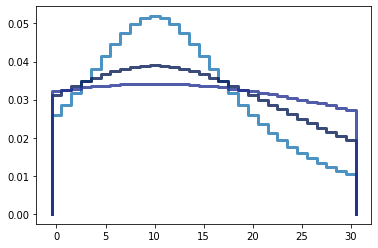

In [116]:
# location pmf with fixed alpha and beta
alpha=10
betas=[10,20,40]
locations=range(0,31)
pmfs=[]
for beta in betas:
    loc_pmf=MakeLocationPmf(alpha,beta,locations)
    pmfs.append(loc_pmf)
thinkplot.pmfs(pmfs)

## get alpha and beta distribution, update with known locations

In [117]:
# update alpha and beta with known locations
alphas=range(0,31)
betas=range(1,51)
locations=range(0,31)
suite=PaintBall(alphas,betas,locations)

In [118]:
suite.Print()

(0, 1) 0.0006451612903225806
(0, 2) 0.0006451612903225806
(0, 3) 0.0006451612903225806
(0, 4) 0.0006451612903225806
(0, 5) 0.0006451612903225806
(0, 6) 0.0006451612903225806
(0, 7) 0.0006451612903225806
(0, 8) 0.0006451612903225806
(0, 9) 0.0006451612903225806
(0, 10) 0.0006451612903225806
(0, 11) 0.0006451612903225806
(0, 12) 0.0006451612903225806
(0, 13) 0.0006451612903225806
(0, 14) 0.0006451612903225806
(0, 15) 0.0006451612903225806
(0, 16) 0.0006451612903225806
(0, 17) 0.0006451612903225806
(0, 18) 0.0006451612903225806
(0, 19) 0.0006451612903225806
(0, 20) 0.0006451612903225806
(0, 21) 0.0006451612903225806
(0, 22) 0.0006451612903225806
(0, 23) 0.0006451612903225806
(0, 24) 0.0006451612903225806
(0, 25) 0.0006451612903225806
(0, 26) 0.0006451612903225806
(0, 27) 0.0006451612903225806
(0, 28) 0.0006451612903225806
(0, 29) 0.0006451612903225806
(0, 30) 0.0006451612903225806
(0, 31) 0.0006451612903225806
(0, 32) 0.0006451612903225806
(0, 33) 0.0006451612903225806
(0, 34) 0.000645161

(22, 10) 0.0006451612903225806
(22, 11) 0.0006451612903225806
(22, 12) 0.0006451612903225806
(22, 13) 0.0006451612903225806
(22, 14) 0.0006451612903225806
(22, 15) 0.0006451612903225806
(22, 16) 0.0006451612903225806
(22, 17) 0.0006451612903225806
(22, 18) 0.0006451612903225806
(22, 19) 0.0006451612903225806
(22, 20) 0.0006451612903225806
(22, 21) 0.0006451612903225806
(22, 22) 0.0006451612903225806
(22, 23) 0.0006451612903225806
(22, 24) 0.0006451612903225806
(22, 25) 0.0006451612903225806
(22, 26) 0.0006451612903225806
(22, 27) 0.0006451612903225806
(22, 28) 0.0006451612903225806
(22, 29) 0.0006451612903225806
(22, 30) 0.0006451612903225806
(22, 31) 0.0006451612903225806
(22, 32) 0.0006451612903225806
(22, 33) 0.0006451612903225806
(22, 34) 0.0006451612903225806
(22, 35) 0.0006451612903225806
(22, 36) 0.0006451612903225806
(22, 37) 0.0006451612903225806
(22, 38) 0.0006451612903225806
(22, 39) 0.0006451612903225806
(22, 40) 0.0006451612903225806
(22, 41) 0.0006451612903225806
(22, 42)

In [119]:
suite.UpdateSet([15,16,18,21])

1.9032915958109017e-06

In [120]:
suite.Print()

(0, 1) 2.3279607124884e-09
(0, 2) 6.573582540650428e-08
(0, 3) 4.090362888944718e-07
(0, 4) 1.4187821201118857e-06
(0, 5) 3.5826967148740514e-06
(0, 6) 7.38967536649333e-06
(0, 7) 1.3229977829975502e-05
(0, 8) 2.1323977530911454e-05
(0, 9) 3.169340833421999e-05
(0, 10) 4.41734934810467e-05
(0, 11) 5.845387263209021e-05
(0, 12) 7.413278529441859e-05
(0, 13) 9.077100794472322e-05
(0, 14) 0.00010793674466828432
(0, 15) 0.00012523758370586402
(0, 16) 0.00014233937671895424
(0, 17) 0.00015897409227692323
(0, 18) 0.0001749395608359465
(0, 19) 0.00019009400771432332
(0, 20) 0.00020434778866336214
(0, 21) 0.00021765410864208558
(0, 22) 0.0002299999001468256
(0, 23) 0.0002413975457887972
(0, 24) 0.00025187777092386426
(0, 25) 0.0002614837934624585
(0, 26) 0.0002702666742468897
(0, 27) 0.00027828173585679543
(0, 28) 0.0002855858874346957
(0, 29) 0.00029223569053244395
(0, 30) 0.0002982860136535462
(0, 31) 0.0003037891429224526
(0, 32) 0.0003087942381123097
(0, 33) 0.00031334704425268394
(0, 34) 

(22, 27) 0.0005570016069557614
(22, 28) 0.000544805434729213
(22, 29) 0.0005337121098376185
(22, 30) 0.0005235969840749867
(22, 31) 0.0005143518419207236
(22, 32) 0.0005058824979880781
(22, 33) 0.0004981067657980183
(22, 34) 0.000490952741086743
(22, 35) 0.0004843573502208017
(22, 36) 0.00047826512142752013
(22, 37) 0.00047262714304224546
(22, 38) 0.0004674001786791915
(22, 39) 0.0004625459141365456
(22, 40) 0.00045803031500292246
(22, 41) 0.0004538230774231306
(22, 42) 0.00044989715739606796
(22, 43) 0.0004462283664023168
(22, 44) 0.0004427950231720497
(22, 45) 0.0004395776530733263
(22, 46) 0.00043655872798526753
(22, 47) 0.0004337224406691227
(22, 48) 0.0004310545086039966
(22, 49) 0.0004285420030469951
(22, 50) 0.00042617319973791145
(23, 1) 1.0194507585720813e-05
(23, 2) 0.00010606503139396838
(23, 3) 0.0003045336810177889
(23, 4) 0.0005349348844055483
(23, 5) 0.0007343240648601247
(23, 6) 0.000876242525658913
(23, 7) 0.0009606138483982232
(23, 8) 0.0009988643450844514
(23, 9) 0.0

## get most possible(credible interval) of alpha and beta: from marginal distribution

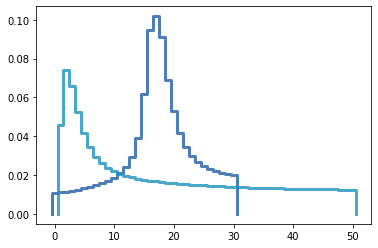

In [121]:
# marginal distribution of alpha and beta
marginal_alpha=suite.Marginal(0)
marginal_beta=suite.Marginal(1)
# pdf
thinkplot.pmfs([marginal_alpha,marginal_beta])

In [122]:
# credible interval
print(marginal_alpha.CredibleInterval(50))
print(marginal_alpha.CredibleInterval(90))
print(marginal_beta.CredibleInterval(50))
print(marginal_beta.CredibleInterval(90))

(14, 21)
(4, 28)
(5, 31)
(2, 47)


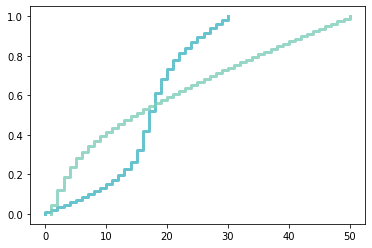

In [123]:
# cdf
marginal_alpha_cdf=marginal_alpha.MakeCdf()
marginal_beta_cdf=marginal_beta.MakeCdf()
thinkplot.cdfs([marginal_alpha_cdf,marginal_beta_cdf])

 - The range of credible interval with 90% is too large: alpha=(4,28), beta=(2,47)
 - Looking at the credible interval of the 2 variables seperately is incorrect, we should look at the joint distribution, because the 2 variables are not independent (can be seen from the following conditional distribution -  they depend on different conditions).

## from conditional marginal distribution

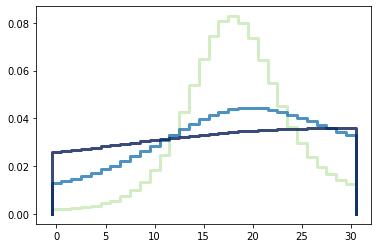

In [124]:
# posterior conditional marginal distribution
pmfs=[]
for beta in [10,20,40]:
    cond_alpha=suite.Conditional(0,1,beta)
    pmfs.append(cond_alpha)
thinkplot.pmfs(pmfs)

Alpha and beta are related, so we should not use seperate marginal distributions to calculate credible intervals. We should use credible interval of joint distribution.

## credible interval of *joint* distribution
 - for 1-dim data, the credible interval is around the median.
 - for 2-dim data, how to choose the center of credible interval? 
 
 Choose from the max-like values, in descending order of likelihood. The values may not be continuous, unlike the continuous range around the 50 percentage value.

Text(0, 0.5, 'alpha')

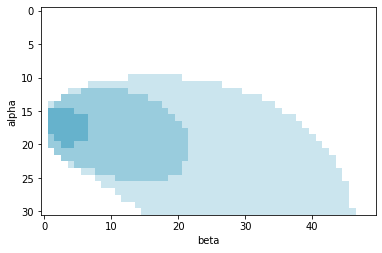

In [176]:
import numpy as np
import matplotlib.pyplot as plt

x=np.zeros((31,50))
for p in [25,50,75]:
    interval=suite.MaxLikeInterval(percentage=p)
    for i,j in interval:
        x[i][j]+=1
plt.imshow(x, cmap="ocean_r", vmin=0, vmax=15)
plt.xlabel("beta")
plt.ylabel("alpha")